In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout,Conv2D,MaxPool2D,Flatten
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cr

(x_train,y_train),(x_test,y_test)=cifar10.load_data()#loading data

In [3]:
class_name=["airplane","automobile","bird","cat" ,"deer" ,"dog","frog","horse","ship" ,"truck"]

In [4]:
x_train.max(),x_train.min(),x_train.mean()

(255, 0, 120.70756512369792)

In [5]:
y_train.max(),y_train.min()

(9, 0)

## Normalizasyon

In [6]:
x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
x_train.max(),x_train.min(),x_train.mean()

(1.0, 0.0, 0.4733630004850874)

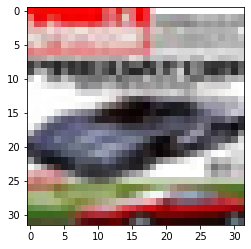

In [8]:
plt.imshow(x_train[6765])

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=[32,32,3]))

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))

In [12]:
model.add(MaxPool2D(pool_size=2,strides=2,padding="valid"))

In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))

In [14]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2,padding="valid"))

In [15]:
model.add(Dropout(0.4))

In [16]:
model.add(Flatten())

## NN


In [17]:
model.add(Dense(units=128,activation="relu"))

In [18]:
model.add(Dense(units=10,activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0

In [20]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics="sparse_categorical_accuracy")


In [21]:
model.fit(x_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
5000/5000 [==============================] - 259s 51ms/step - loss: 1.6914 - sparse_categorical_accuracy: 0.3754
Epoch 2/10
5000/5000 [==============================] - 247s 49ms/step - loss: 1.0832 - sparse_categorical_accuracy: 0.6120
Epoch 3/10
5000/5000 [==============================] - 257s 51ms/step - loss: 0.9022 - sparse_categorical_accuracy: 0.68125s - loss: 0.9023 - sparse_cat - E
Epoch 4/10
5000/5000 [==============================] - 223s 45ms/step - loss: 0.7996 - sparse_categorical_accuracy: 0.7197
Epoch 5/10
5000/5000 [==============================] - 256s 51ms/step - loss: 0.7302 - sparse_categorical_accuracy: 0.7404
Epoch 6/10
5000/5000 [==============================] - 229s 46ms/step - loss: 0.6731 - sparse_categorical_accuracy: 0.7624
Epoch 7/10
5000/5000 [==============================] - 211s 42ms/step - loss: 0.6289 - sparse_categorical_accuracy: 0.7790
Epoch 8/10
5000/5000 [==============================] - 238s 48ms/step - loss: 0.5946 - sparse_cat

In [23]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.7900 - sparse_categorical_accuracy: 0.7370


In [25]:
print(test_acc)

0.7369999885559082


In [26]:
y_pred=model.predict_classes(x_test)

C:\Users\yusuf\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [31]:
from sklearn.metrics import  confusion_matrix,accuracy_score
cn=confusion_matrix(y_test,y_pred)

In [32]:
acc_cm=accuracy_score(y_test,y_pred)